<a href="https://colab.research.google.com/github/azavalae/fisica_computacional/blob/main/Actividad5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import matplotlib.dates as mdates
import seaborn as sns
import statsmodels.api as sm 

%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
url = 'https://raw.githubusercontent.com/azavalae/fisica_computacional/main/Actividad1/26053.txt'

my_cols = ['Fecha', 'Precip', 'Evap', 'Tmax', 'Tmin']
df_dist = pd.read_csv(url, names=my_cols, encoding='cp1251', sep='\s+', header=None, skiprows=19, skipfooter=1, engine='python')

df_work0 = df_dist.copy()

# Reemplazamos los textos 'Nulo' por espacio en blanco ''
str_Nulo = 'Nulo'
df_work1 = df_work0.replace(to_replace=str_Nulo, value='', regex=True)

# Deseamos convertir los valores de las variables ambientales a núm. flotantes 
cols_list = ['Precip', 'Evap', 'Tmax', 'Tmin']
for cols in cols_list:
  df_work1[cols] = pd.to_numeric(df_work1[cols], errors='coerce')

# Volvemos a hacer una pausa y definimos un nuevo dataframe por si hay que regresarse.
df_work2 = df_work1.copy()

# Pandas tiene la función pd.to_datetime que convierte una cadena en tipo datetime64[ns]
# Intentamos a ver si Python reconoce el formato en nuestro caso. 
# Agregamos la opción de que el primer dato es el día (dayfirst=True)
df_work2['Fecha']=pd.to_datetime(df_work2['Fecha'], dayfirst=True).copy()

# Buscamos ahora añadir dos columnas adicionales: df['Año'], df['Mes']
# Usaremos la función .dt.year y .dt.strftime(%b) para extraer el Año 
# y Mes (Abreviado) de la Fecha
df_work2['Año'] = df_work2['Fecha'].dt.year
df_work2['Mes'] = df_work2['Fecha'].dt.strftime('%b')

# Definimos un nuevo DataFrame para el análisis de los datos meteorológicos. 
# Será nuestro nuevo punto de partida.
df_meteo = df_work2.copy()
df_meteo.info()
print(df_meteo.head())
print(df_meteo.tail())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31655 entries, 0 to 31654
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Fecha   31655 non-null  datetime64[ns]
 1   Precip  31402 non-null  float64       
 2   Evap    196 non-null    float64       
 3   Tmax    31551 non-null  float64       
 4   Tmin    31648 non-null  float64       
 5   Año     31655 non-null  int64         
 6   Mes     31655 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 1.7+ MB
       Fecha  Precip  Evap  Tmax  Tmin   Año  Mes
0 1927-02-01     0.0   NaN  26.5  13.5  1927  Feb
1 1927-02-02     0.0   NaN  27.0  13.8  1927  Feb
2 1927-02-03     0.0   NaN  24.1  12.8  1927  Feb
3 1927-02-04     0.0   NaN  26.5  11.7  1927  Feb
4 1927-02-05     0.0   NaN  25.5   9.8  1927  Feb
           Fecha  Precip  Evap  Tmax  Tmin   Año  Mes
31650 2016-04-26     0.0   NaN  33.0  12.0  2016  Apr
31651 2

In [7]:
df_meteo_ts = df_meteo.copy()
df_meteo_ts = df_meteo.set_index('Fecha')

In [8]:
df_90 = df_meteo_ts[(df_meteo_ts['Año'] >= 1990) & (df_meteo_ts['Año'] < 2016)]
df_60 = df_meteo_ts[(df_meteo_ts['Año'] >= 1960) & (df_meteo_ts['Año'] < 1990)]

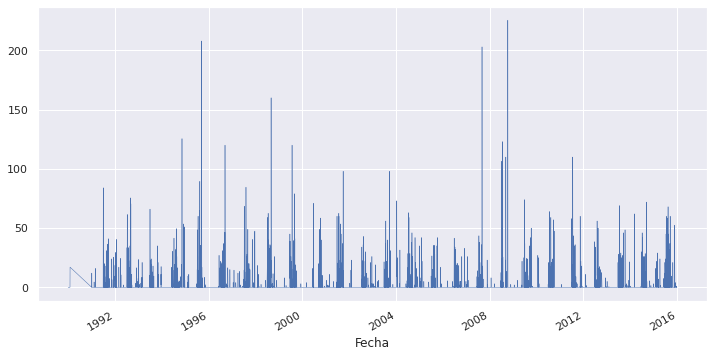

In [ ]:
sns.set(rc={'figure.figsize':(12, 6)})

df_90['Precip'].plot(linewidth=0.5);

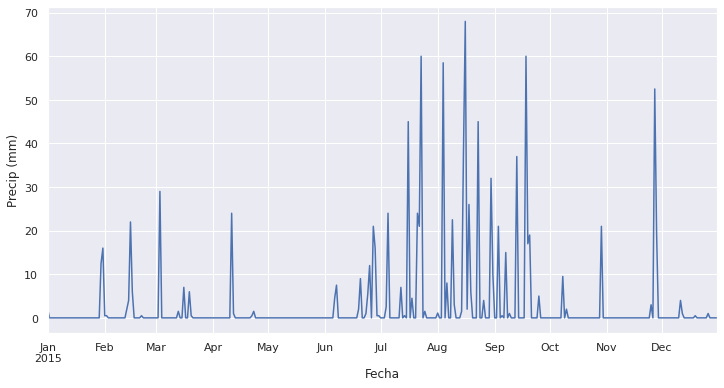

In [ ]:
ax = df_90.loc['2015', 'Precip'].plot()

ax.set_ylabel('Precip (mm)');

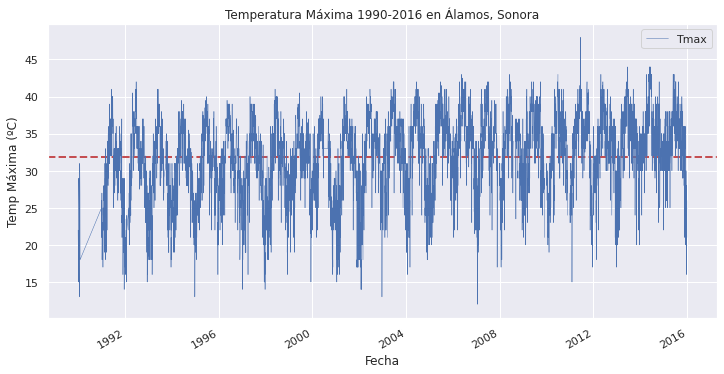

In [ ]:
sns.set(rc={'figure.figsize':(12, 6)})

Tmax_ave_90 = df_90.Tmax.mean()

plt.axhline(Tmax_ave_90, color = 'r', linestyle='--', linewidth=2);
df_90['Tmax'].plot(linewidth=0.5);
plt.ylabel('Temp Máxima (ºC)');
plt.title('Temperatura Máxima 1990-2016 en Álamos, Sonora')

plt.legend();


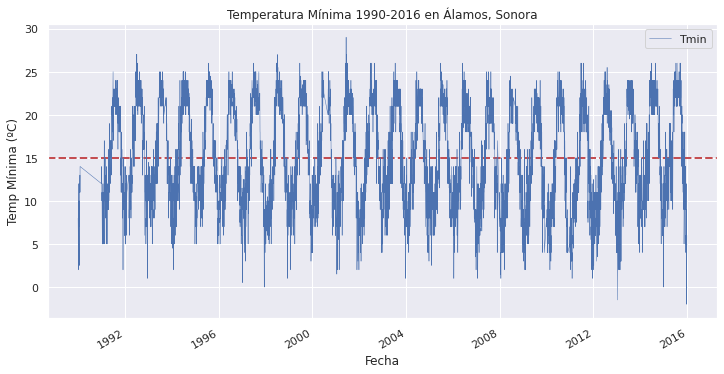

In [ ]:
sns.set(rc={'figure.figsize':(12, 6)})

Tmin_ave_90 = df_90.Tmin.mean()

plt.axhline(Tmin_ave_90, color = 'r', linestyle='--', linewidth=2);

df_90['Tmin'].plot(linewidth=0.5);
plt.ylabel('Temp Mínima (ºC)');
plt.title('Temperatura Mínima 1990-2016 en Álamos, Sonora')

plt.legend();

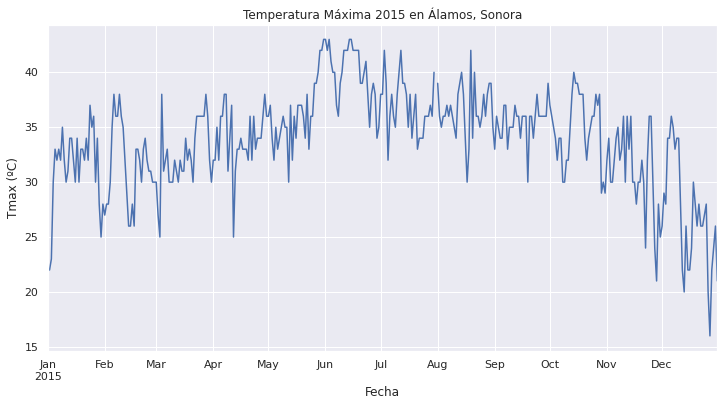

In [ ]:
sns.set(rc={'figure.figsize':(12, 6)})

ax = df_90.loc['2015', 'Tmax'].plot()
ax.set_ylabel('Tmax (ºC)');
ax.set_title('Temperatura Máxima 2015 en Álamos, Sonora');

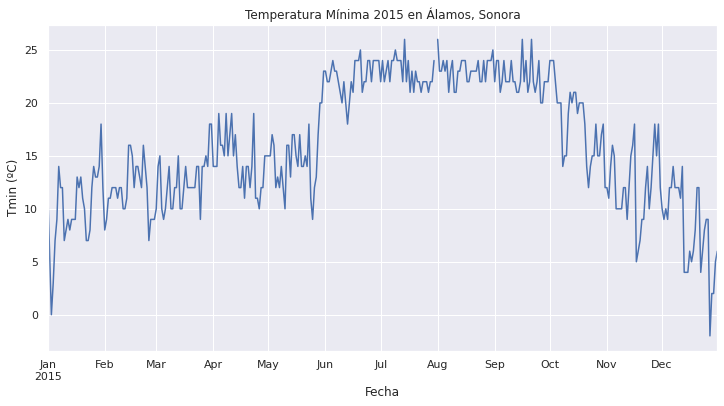

In [ ]:
sns.set(rc={'figure.figsize':(12, 6)})

ax = df_90.loc['2015', 'Tmin'].plot()
ax.set_ylabel('Tmin (ºC)');
ax.set_title('Temperatura Mínima 2015 en Álamos, Sonora');

In [ ]:
sns.set(rc={'figure.figsize':(12, 6)})

# Cálculo de promedio
Tmax_ave_90 = df_90.Evap.mean()

# Graficar líneas promedios (rojo 1990-2017, azul 1960-1989)
plt.axhline(Tmax_ave_90, color = 'r', linestyle='--', linewidth=2);

# Graficar la Temper-201_
df_90['Evap'].plot(linewidth=0.5);
plt.ylabel('Evaporación (mm)');
plt.title('Evaporación 1990-2016 en Álamos, Sonora

plt.legend();

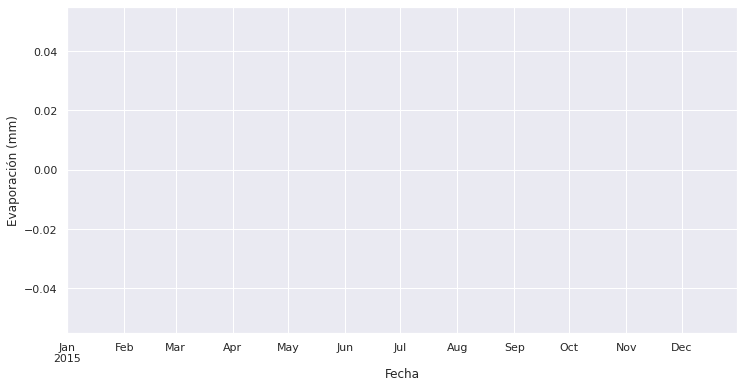

In [ ]:
ax = df_90.loc['2015', 'Evap'].plot()
ax.set_ylabel('Evaporación (mm)');

In [ ]:
data_cols = ['Evap', 'Tmax', 'Tmin']
df_90_7d = df_90[data_cols].rolling(7, center=True).mean()
df_90_30d = df_90[data_cols].rolling(30, center=True).mean()
df_90_365d = df_90[data_cols].rolling(365, center=True).mean()

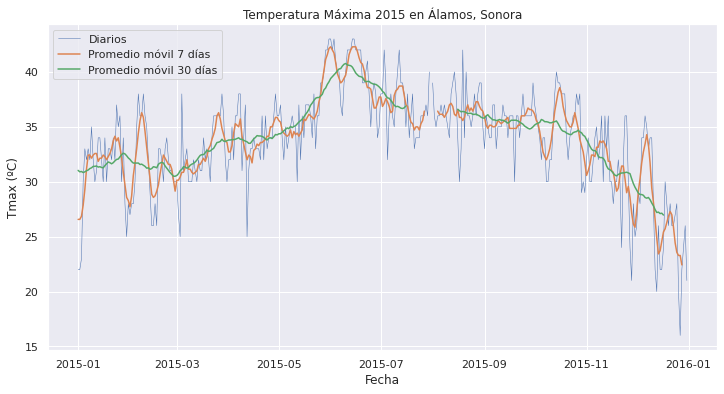

In [ ]:
start, end = '2015-01', '2015-12'

# Contraste de la gráfica de datos diarios y la de promedio móvil de 7 días 
sns.set(rc={'figure.figsize':(12, 6)})

fig, ax = plt.subplots()
ax.plot(df_90.loc[start:end, 'Tmax'],
linestyle='-', linewidth=0.5, label='Diarios')
ax.plot(df_90_7d.loc[start:end, 'Tmax'], linestyle='-', label='Promedio móvil 7 días')
ax.plot(df_90_30d.loc[start:end, 'Tmax'], linestyle='-', label='Promedio móvil 30 días')

ax.set_xlabel('Fecha')
ax.set_ylabel('Tmax (ºC)')
ax.set_title('Temperatura Máxima 2015 en Álamos, Sonora')
ax.legend();


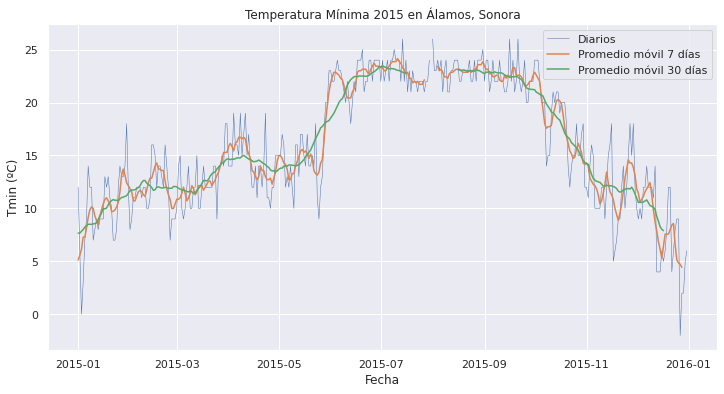

In [ ]:
start, end = '2015-01', '2015-12'

# Contraste de la gráfica de datos diarios y la de promedio móvil de 7 días 
sns.set(rc={'figure.figsize':(12, 6)})

fig, ax = plt.subplots()
ax.plot(df_90.loc[start:end, 'Tmin'],
linestyle='-', linewidth=0.5, label='Diarios')
ax.plot(df_90_7d.loc[start:end, 'Tmin'], linestyle='-', label='Promedio móvil 7 días')
ax.plot(df_90_30d.loc[start:end, 'Tmin'], linestyle='-', label='Promedio móvil 30 días')

ax.set_xlabel('Fecha')
ax.set_ylabel('Tmin (ºC)')
ax.set_title('Temperatura Mínima 2015 en Álamos, Sonora')
ax.legend();

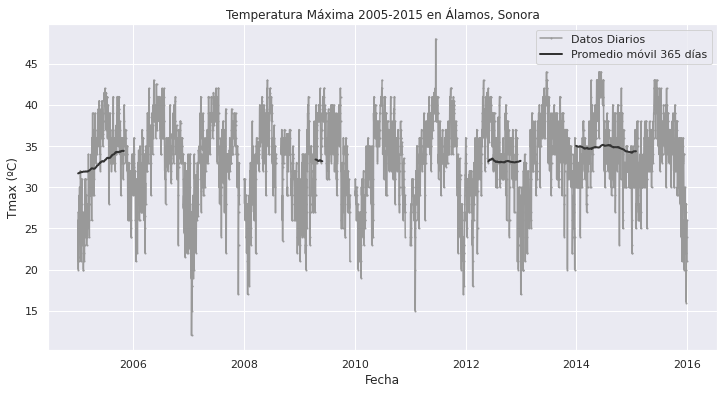

In [ ]:
start, end = '2005-01', '2015-12'

# Contraste de la gráfica de datos diarios y promedio móvil de 30 y 365 días 
sns.set(rc={'figure.figsize':(12, 6)})

fig, ax = plt.subplots()
ax.plot(df_90.loc[start:end, 'Tmax'],
marker='.', markersize=2, linestyle='-', color='0.6',label='Datos Diarios')
ax.plot(df_90_365d.loc[start:end, 'Tmax'], linestyle='-', color='0.2', linewidth=2, label='Promedio móvil 365 días')

ax.set_xlabel('Fecha')
ax.set_ylabel('Tmax (ºC)')
ax.set_title('Temperatura Máxima 2005-2015 en Álamos, Sonora')
ax.legend();

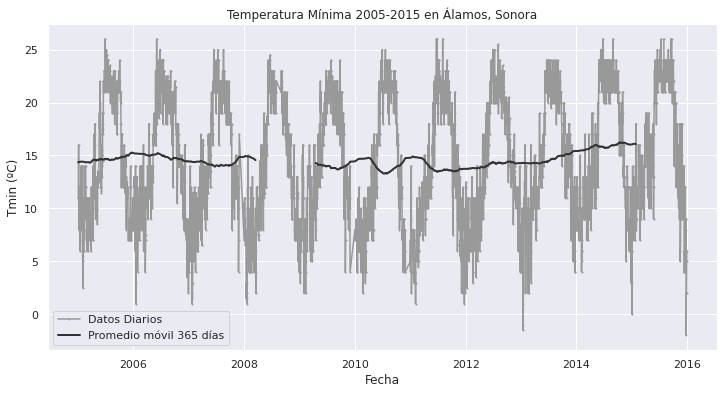

In [ ]:
start, end = '2005-01', '2015-12'

# Contraste de la gráfica de datos diarios y promedio móvil de 30 y 365 días 
sns.set(rc={'figure.figsize':(12, 6)})

fig, ax = plt.subplots()
ax.plot(df_90.loc[start:end, 'Tmin'],
marker='.', markersize=2, linestyle='-', color='0.6',label='Datos Diarios')
ax.plot(df_90_365d.loc[start:end, 'Tmin'], linestyle='-', color='0.2', linewidth=2, label='Promedio móvil 365 días')

ax.set_xlabel('Fecha')
ax.set_ylabel('Tmin (ºC)')
ax.set_title('Temperatura Mínima 2005-2015 en Álamos, Sonora')
ax.legend();

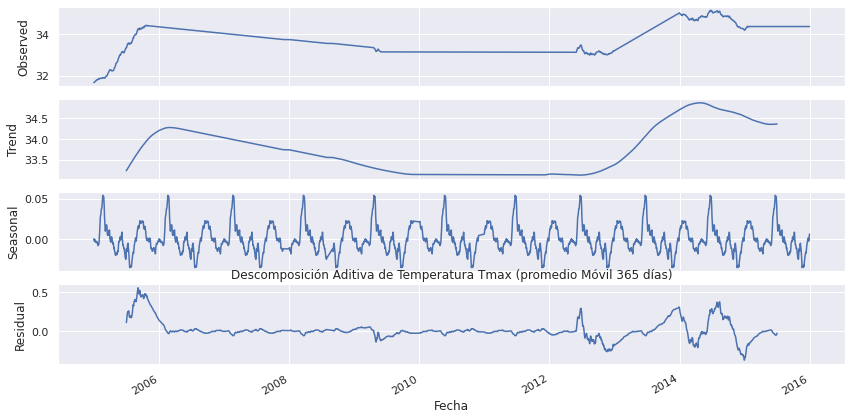

In [ ]:


sns.set(rc={'figure.figsize':(12, 6)})
# Periodo de datos completos (No funciona cuando hace falta un rango de datos)
start, end = '2005-01', '2017-06'

# Ciclo anual 365 días (Por las Estaciones)
decompfreq = 365

# Uso del modelo 'statsmodel' para el análisis de series de tiempo(sm.tsa) 


resTmax = sm.tsa.seasonal_decompose(df_90_365d.loc[start:end, 'Tmax'].interpolate(),
                                    freq=decompfreq, model='additive')
resTmax.plot()

plt.title('Descomposición Aditiva de Temperatura Tmax (promedio Móvil 365 días)');

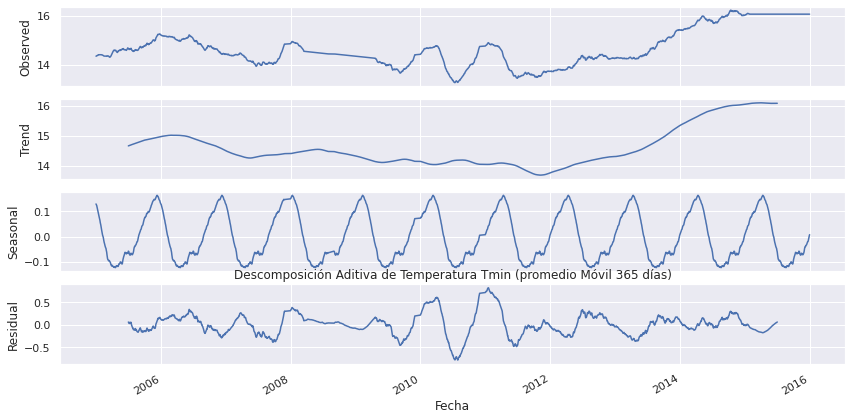

In [ ]:
sns.set(rc={'figure.figsize':(12, 6)})
# Periodo de datos completos (No funciona cuando hace falta un rango de datos)
start, end = '2005-01', '2017-06'

# Ciclo anual 365 días (Por las Estaciones)
decompfreq = 365

# Uso del modelo 'statsmodel' para el análisis de series de tiempo(sm.tsa) 


resTmax = sm.tsa.seasonal_decompose(df_90_365d.loc[start:end, 'Tmin'].interpolate(),
                                    freq=decompfreq, model='additive')
resTmax.plot()

plt.title('Descomposición Aditiva de Temperatura Tmin (promedio Móvil 365 días)');

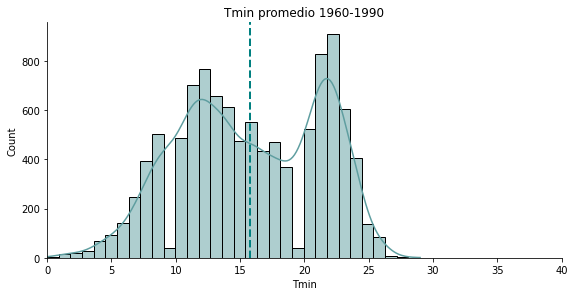

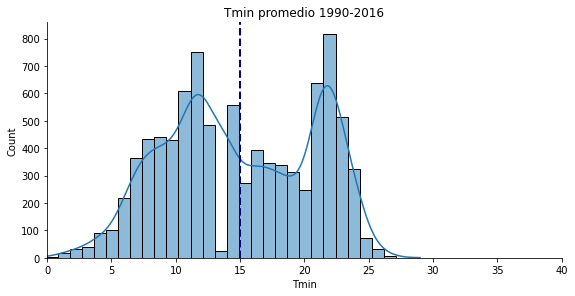

Tmin_promedio df_60 =  15.772547542835625 ºC
Tmin_promedio df_90 =  14.990476724621425 ºC
Tmin_sdev df_60 =  5.486668583068258 ºC
Tmin_sdev df_90 =  5.752634981444752 ºC


In [10]:
g2 = sns.displot(df_60.Tmin, kde=True, color='cadetblue', height=4, aspect=2);
plt.axvline(df_60.Tmin.mean(), linestyle='--', linewidth=2, color='teal');

g3 = sns.displot(df_90.Tmin, kde=True, height=4, aspect=2);
plt.axvline(df_90.Tmin.mean(), linestyle='--', linewidth=2, color='navy');

g2.set(title='Tmin promedio 1960-1990');
g3.set(title='Tmin promedio 1990-2016');
g2.set(xlim=(0,40))
g3.set(xlim=(0,40))

plt.show();

print('Tmin_promedio df_60 = ', df_60.Tmin.mean(), 'ºC' )
print('Tmin_promedio df_90 = ', df_90.Tmin.mean(), 'ºC' )

print('Tmin_sdev df_60 = ', df_60.Tmin.std(), 'ºC' )
print('Tmin_sdev df_90 = ', df_90.Tmin.std(), 'ºC' )

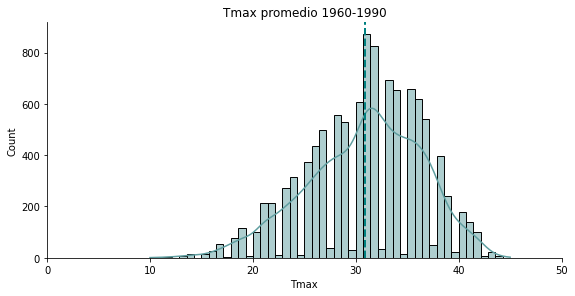

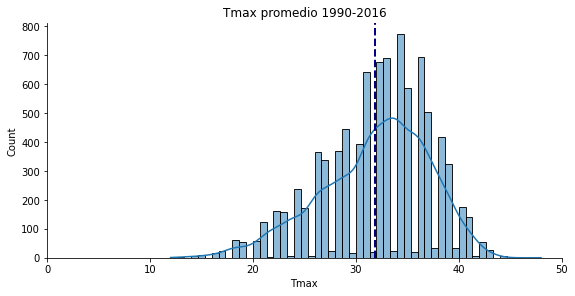

Tmax_promedio df_60 =  30.90316294831969 ºC
Tmax_promedio df_90 =  31.909220575022456 ºC
Tmax_sdev df_60 =  5.556730697668094 ºC
Tmax_sdev df_90 =  5.280345439488464 ºC


In [13]:
g2 = sns.displot(df_60.Tmax, kde=True, color='cadetblue', height=4, aspect=2);
plt.axvline(df_60.Tmax.mean(), linestyle='--', linewidth=2, color='teal');

g3 = sns.displot(df_90.Tmax, kde=True, height=4, aspect=2);
plt.axvline(df_90.Tmax.mean(), linestyle='--', linewidth=2, color='navy');

g2.set(title='Tmax promedio 1960-1990');
g3.set(title='Tmax promedio 1990-2016');
g2.set(xlim=(0,50))
g3.set(xlim=(0,50))

plt.show();

print('Tmax_promedio df_60 = ', df_60.Tmax.mean(), 'ºC' )
print('Tmax_promedio df_90 = ', df_90.Tmax.mean(), 'ºC' )

print('Tmax_sdev df_60 = ', df_60.Tmax.std(), 'ºC' )
print('Tmax_sdev df_90 = ', df_90.Tmax.std(), 'ºC' )